In [2]:
import nltk
from collections import Counter
import pandas as pd


# Read File

In [3]:
new_path = '/home/cloudera/cs.txt'
def read_file(str):
    file = open(str,'r')
    txt=file.read()
    #print(txt)
    return txt

In [4]:
txt=read_file(new_path)


In [5]:
type(txt)

str

# Split text to pragraphs 

In [6]:
def txt_pragraphs(str):
    pragraphs = str.split("\n\n")
    return pragraphs
pragraphs=txt_pragraphs(txt)
type(pragraphs)


list

In [291]:
pragraphs[2]


'    Computer science also has strong connections to other disciplines. Many problems in science, engineering, health care, business, and other areas can be solved effectively with computers, but finding a solution requires both computer science expertise and knowledge of the particular application domain. Thus, computer scientists often become proficient in other subjects.'

# Split Pragraph to Sentences 

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize


In [292]:
#print(sent_tokenize(pragraphs(txt)[1]))
def pragraph_to_setnences(str):
    return sent_tokenize(str)
setnences=pragraph_to_setnences(pragraphs[2])


## Word Process For Sentence

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

## Removing English stopwords and Punct per Sentence

In [11]:
new_stop_words = ['the', 'that', 'to', 'as', 'there', 'has', 'and', 'or', 'is', 'not', 'a', 'of', 'but', 'in', 'by', 'on', 'are', 'it', 'if','what','where','how','when']
new_stop_words2=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now','even','until','then']

from stemming.porter2 import stem
from nltk import PorterStemmer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
#stemmer = PorterStemmer()
stemmer = SnowballStemmer("english", ignore_stopwords=True)
def remove_stopword_sentences(str):
    tokenizer = RegexpTokenizer("[\w']+")
    words=tokenizer.tokenize(str)
    english_stops = set(stopwords.words('english'))
    stems=[]
    list_word=[word for word in words if word.lower() not in english_stops and word.lower() not in new_stop_words and word.lower() not in new_stop_words2]
    for word in list_word:
        #stems.append(stem(word))
        #stems.append(PorterStemmer().stem(word))
        #stems.append(stemmer.stem(word))
        #stems.append(stemmer.stem("computer"))
        stems.append(word)
    
    return stems#(stem(setem_word for setem_word in  ([word for word in words if word not in english_stops and word not in new_stop_words])))

In [294]:
words=remove_stopword_sentences(setnences[1])
count = Counter(words)
# to count words
#print (count.most_common(10))
print(words)
print(count)

['Many', 'problems', 'science', 'engineering', 'health', 'care', 'business', 'areas', 'solved', 'effectively', 'computers', 'finding', 'solution', 'requires', 'computer', 'science', 'expertise', 'knowledge', 'particular', 'application', 'domain']
Counter({'science': 2, 'particular': 1, 'requires': 1, 'problems': 1, 'expertise': 1, 'domain': 1, 'engineering': 1, 'solution': 1, 'business': 1, 'areas': 1, 'solved': 1, 'knowledge': 1, 'finding': 1, 'effectively': 1, 'health': 1, 'computers': 1, 'computer': 1, 'application': 1, 'care': 1, 'Many': 1})


# Compute Frequencies

In [295]:


def compute_freq(word_vec):
    headers=["Freq"]
    
    word_nonfreq={}
    
    for index in range(len(word_vec)):
        #word_nonfreq.append(word)
        
        for index2 in range(len(word_vec)):
            counter=0
            if index2+1 in range(len(word_vec)):
                print (word_vec[index],word_vec[index2+1])
                if word_vec[index]==word_vec[index2+1]:
                    counter+=1
        word_nonfreq[ word_vec[index]]=counter
        #print(counter)
        #df_frequencies.loc[word]=counter
    df_frequencies = pd.DataFrame(word_nonfreq,index=headers, columns=word_nonfreq ) 
    
    
    return df_frequencies


def count_freq(word_vec):
    headers=["Freq"]
    count = Counter(word_vec)
    df_frequencies = pd.DataFrame(count,index=headers, columns=count ) 
    #print(count)
    
    return df_frequencies
            
#ss=compute_freq(words)
xx=count_freq(words)
xx
#list(xx)
#ss

,particular,requires,problems,expertise,domain,engineering,solution,business,areas,solved,knowledge,finding,effectively,health,computers,computer,application,care,science,Many
Freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1


## Word Sense Disambiguation (WSD): LESK per Sentence
Given an ambiguous word and the context in which the word occurs, Lesk returns a Synset with the highest number of overlapping words between the context sentence and different definitions from each Synset.



In [296]:
from nltk.wsd import lesk
'''
this function for compute lesk for each word(list of word) in sentence
'''
def lesk_words_sentence(words,sentence):
    lesks= []
    for word in words:
        if lesk(sentence,word, 'n') is not None:
            lesks.append(lesk(sentence,word, 'n'))
            #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesks
    

In [297]:
'''
this function for compute lesk of word in sentence
'''

def lesk_word_sentence(word,sentence):
    #lesks= []
    #for word in words:
    lesk_synset=lesk(sentence,word, 'n')
        #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesk_synset

In [299]:
lesks=lesk_words_sentence(words,setnences[0])
leskss=lesk_word_sentence(words[1],setnences[0])
#print(words[1],setnences[0])
#print (leskss)

In [17]:
#type(lesks)

## Calculating WordNet Synset similarity using information content

In [173]:
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wnic
from nltk.tokenize import word_tokenize

'''
this function for compute similarty between 2 synset 
'''

def similarity_by_infocontent(sense1, sense2, option):
    """ Returns similarity scores by information content. """
    #if sense1.pos != sense2.pos: # infocontent sim can't do diff POS.
        #return 0

    info_contents = ['ic-bnc-add1.dat', 'ic-bnc-resnik-add1.dat', 
                     'ic-bnc-resnik.dat', 'ic-bnc.dat', 

                     'ic-brown-add1.dat', 'ic-brown-resnik-add1.dat', 
                     'ic-brown-resnik.dat', 'ic-brown.dat', 

                     'ic-semcor-add1.dat', 'ic-semcor.dat',

                     'ic-semcorraw-add1.dat', 'ic-semcorraw-resnik-add1.dat', 
                     'ic-semcorraw-resnik.dat', 'ic-semcorraw.dat', 

                     'ic-shaks-add1.dat', 'ic-shaks-resnik.dat', 
                     'ic-shaks-resnink-add1.dat', 'ic-shaks.dat', 

                     'ic-treebank-add1.dat', 'ic-treebank-resnik-add1.dat', 
                     'ic-treebank-resnik.dat', 'ic-treebank.dat']

    if option in ['res', 'resnik']:
        #return wn.res_similarity(sense1, sense2, wnic.ic('ic-bnc-resnik-add1.dat'))
        #print('simRe snik (c1,c2) = -log p(lso(c1,c2)) = IC(lso(c1,c2)')
        return wn.res_similarity(sense1, sense2, wnic.ic('ic-treebank-resnik-add1.dat'))
    #return min(wn.res_similarity(sense1, sense2, wnic.ic(ic)) \
    #             for ic in info_contents)

    elif option in ['jcn', "jiang-conrath"]:
        #return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(jcn) (c1,c2 )= (IC(c1) + IC(c2 )) - 2IC(lso(c1,c2 ))')
        return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

    elif option in ['lin']:
        #return wn.lin_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(lin) (c1,c2)=(2IC(lso(c1,c2 )))/(IC(c1)+IC(c2))')
        return wn.lin_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

def sim(sense1, sense2, option="path"):
    """ Calculates similarity based on user's choice. """
    option = option.lower()
    if option.lower() in ["path", "path_similarity", 
                        "wup", "wupa", "wu-palmer", "wu-palmer",
                        'lch', "leacock-chordorow"]:
        return similarity_by_path(sense1, sense2, option) 
    elif option.lower() in ["res", "resnik",
                          "jcn","jiang-conrath",
                          "lin"]:
        return similarity_by_infocontent(sense1, sense2, option)

def max_similarity(context_sentence, ambiguous_word, option="path", 
                   pos=None, best=True):
    """
    Perform WSD by maximizing the sum of maximum similarity between possible 
    synsets of all words in the context sentence and the possible synsets of the 
    ambiguous words (see http://goo.gl/XMq2BI):
    {argmax}_{synset(a)}(\sum_{i}^{n}{{max}_{synset(i)}(sim(i,a))}
    """
    result = {}
    for i in wn.synsets(ambiguous_word):
        try:
            if pos and pos != str(i.pos()):
                continue
        except:
            if pos and pos != str(i.pos):
                continue
        result[i] = sum(max([sim(i,k,option) for k in wn.synsets(j)]+[0]) \
                        for j in word_tokenize(context_sentence))

    if option in ["res","resnik"]: # lower score = more similar
        result = sorted([(v,k) for k,v in result.items()])
    else: # higher score = more similar
        result = sorted([(v,k) for k,v in result.items()],reverse=True)
    #print (result)
    if best: return result[0][1];
    return result

In [298]:
print(lesks[2],lesks[1])
similarity_by_infocontent(lesks[2],lesks[1],'res')

Synset('user.n.01') Synset('computer.n.01')


1.5520118749329381

In [20]:
#wn.res_similarity(lesks[1],lesks[2], wnic.ic('ic-bnc-resnik-add1.dat'))

In [21]:
#similarity_by_infocontent(lesks[2],lesks[1],'jcn')

In [22]:
#similarity_by_infocontent(lesks[2],lesks[1],'lin')

## Simlarty per Words for Sentence

In [174]:
#df_sentence_similarty = pd.DataFrame(index=words, columns=words )
#df_sentence_similarty.loc[words[0]]=[1,2,3,4,5,6]
'''
to retrive similarty between list of synset
'''
rows_list = []
def simlarty_perWords(list_words,option):
    for index in range(len(list_words)):
        if index+1 <len(list_words):
            #df_similarty.loc[list_words[index]]
            #print(list_words[index].lowest_common_hypernyms(list_words[index+1]))
            #print(list_words[index],list_words[index+1],similarity_by_infocontent(list_words[index],list_words[index+1],option))
            rows_list.append(similarity_by_infocontent(list_words[index],list_words[index+1],option))
    return rows_list
            

In [300]:
simlarty_perWords(lesks,'res')

[3.0862609105980248,
 -0.0,
 -0.0,
 3.3979222995980938,
 0.622354726626253,
 0.622354726626253,
 -0.0,
 -0.0,
 2.432224623297784,
 -0.0,
 -0.0,
 0.622354726626253,
 0.622354726626253,
 0.622354726626253,
 -0.0,
 -0.0]

In [25]:
#simlarty_perWords(lesks,'lin')

In [26]:
#simlarty_perWords(lesks,'jcn')

# TF-IDF
TF-IDF stands for "Term Frequency, Inverse Document Frequency". It is a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents.

Intuitively...
If a word appears frequently in a document, it's important. Give the word a high score.
But if a word appears in many documents, it's not a unique identifier. Give the word a low score.

In [27]:
import tfidf
#https://github.com/hrs/python-tf-idf
table = tfidf.tfidf()
table.addDocument("foo", [lesks[0],lesks[1],lesks[3]])
#table.addDocument("bar", ["alpha", "bravo", "charlie", "india", "juliet", "kilo"])
#table.addDocument("baz", ["kilo", "lima", "mike", "november"])

#print (table.similarities ([lesks[0],lesks[1],lesks[3]]))

In [28]:
import pandas as pd
from pandas import Series, DataFrame


In [29]:
#df

# Pragraph Words Similarty

In [155]:
'''
calculate IC(p(C1)) per feature and 
'''
'''
get lesk of vector per pragraph
'''

def pragraph_lesks(pragraph,option):
    lesk_vec=[]# synset lesk of words per pragraph
    #synset_lesk_noDuplicates=[]
    Sentences=pragraph_to_setnences(pragraph)
    for sentence in Sentences:
        Words=remove_stopword_sentences(sentence)
        for word in Words:
            lesk_synset=lesk_word_sentence(word,sentence)
            if lesk_synset is not None:
                lesk_vec.append(lesk_synset)

    return lesk_vec

    

In [301]:
lesk_vec=pragraph_lesks(pragraphs[2],'res')

In [302]:
'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies
'''
def Dimensionality_reduction(lesk_vec):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
    lesk_vec_after_freq=DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] > 1].T).T
    return lesk_vec_after_freq
    #total=df_freq.values.sum().sum()

In [303]:
lesk_vec_after_Dimensionality_reduction=Dimensionality_reduction(lesk_vec)
lesk_vec_after_Dimensionality_reduction

,Synset('science.n.01'),Synset('computer.n.01')
Freq,3.0,4.0


In [304]:

'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies and ratio
'''

def Dimensionality_reduction_with_ratio(lesk_vec):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
    lesk_vec_after_freq=DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] > 1].T)
    
    total=lesk_vec_after_freq.values.sum().sum()
    lesk_vec_after_freq['Ratio']=(lesk_vec_after_freq['Freq']/total)
    
    return lesk_vec_after_freq.T

In [305]:
rmv_red_ratio=Dimensionality_reduction_with_ratio(lesk_vec)
rmv_red_ratio

,Synset('science.n.01'),Synset('computer.n.01')
Freq,3.000000,4.000000
Ratio,0.428571,0.571429


In [306]:
'''
calculate simantic simelart for Dimensionality reduction vector
say vector is n element [n1,n2,n3,.....nm], data frame row=n,col=n
sim(n[row],n[col])if if row != col:
option is sim method like res,lin,jcn ...... for IC

'''


def sim_pragraph_lesk(df_freq,option):
    
    series=list(df_freq)#pd.Series(data=lesk_vec)
    #series.drop_duplicates()
    synset_lesk_noDuplicates= series#.tolist()    
    df_all_synset_lesk = pd.DataFrame(index=series, columns=series )            
    #print ("synset_lesk_noDuplicates",len(synset_lesk_noDuplicates))
    
    for row in range(len(synset_lesk_noDuplicates)):
        try:
            data_row=[]
            for col in range(len(synset_lesk_noDuplicates)):

                    if row != col:

                        sim=similarity_by_infocontent(series[row],series[col],option)
                        if sim is not None:
                            data_row.append(sim)
                        else:
                            data_row.append(0)
                        #print(len(data_row))


                    else:

                        data_row.append(0)
                        #print(len(data_row))

            #print(series[row])
            df_all_synset_lesk.loc[series[row]]=data_row
        except  Exception as inst:
                data_row.append(0)
                print(type(inst))    # the exception instance
                print(inst.args)     # arguments stored in .args
                print(inst)          # __str__ allows args to be printed directly,
                pass
                #print("Ex")
    return df_all_synset_lesk



In [312]:
sim_lesk_vec_after_Dimensionality_reduction=sim_pragraph_lesk(lesk_vec_after_redundant,'res')
sim_lesk_vec_after_Dimensionality_reduction

,Synset('trouble.n.01'),Synset('must.n.01'),Synset('terminus.n.03'),Synset('resolution.n.04'),Synset('computer.n.01'),Synset('science.n.01')
Synset('trouble.n.01'),0,-0,0.622355,1.78127,-0,3.08626
Synset('must.n.01'),-0,0,0.769715,-0,0.769715,-0
Synset('terminus.n.03'),0.622355,0.769715,0,0.622355,2.56104,0.622355
Synset('resolution.n.04'),1.78127,-0,0.622355,0,-0,1.78127
Synset('computer.n.01'),-0,0.769715,2.56104,-0,0,-0
Synset('science.n.01'),3.08626,-0,0.622355,1.78127,-0,0


In [308]:
'''
calculate similartyin_pragraph

'''

def similarty_pragraph(pragraph,option):
    lesk_vec=pragraph_lesks(pragraph,option)
    lesk_vec_after_Dimensionality_reduction=Dimensionality_reduction(lesk_vec)
    sim_lesk_vec_after_Dimensionality_reduction=sim_pragraph_lesk(lesk_vec_after_redundant,option)
    return sim_lesk_vec_after_Dimensionality_reduction
    

In [313]:
res_df=similarty_pragraph(pragraphs[2],'res')
res_df
#res_df.to_csv('res_df.csv')



,Synset('trouble.n.01'),Synset('must.n.01'),Synset('terminus.n.03'),Synset('resolution.n.04'),Synset('computer.n.01'),Synset('science.n.01')
Synset('trouble.n.01'),0,-0,0.622355,1.78127,-0,3.08626
Synset('must.n.01'),-0,0,0.769715,-0,0.769715,-0
Synset('terminus.n.03'),0.622355,0.769715,0,0.622355,2.56104,0.622355
Synset('resolution.n.04'),1.78127,-0,0.622355,0,-0,1.78127
Synset('computer.n.01'),-0,0.769715,2.56104,-0,0,-0
Synset('science.n.01'),3.08626,-0,0.622355,1.78127,-0,0


In [314]:
jcn_df=similarty_pragraph(pragraphs[2],'jcn')
jcn_df

,Synset('trouble.n.01'),Synset('must.n.01'),Synset('terminus.n.03'),Synset('resolution.n.04'),Synset('computer.n.01'),Synset('science.n.01')
Synset('trouble.n.01'),0,0.0602295,0.067755,0.0673022,0.066154,0.111446
Synset('must.n.01'),0.0602295,0,0.06669,0.0523072,0.0697054,0.0629815
Synset('terminus.n.03'),0.067755,0.06669,0,0.0578914,0.0940726,0.0712577
Synset('resolution.n.04'),0.0673022,0.0523072,0.0578914,0,0.0567186,0.070757
Synset('computer.n.01'),0.066154,0.0697054,0.0940726,0.0567186,0,0.069489
Synset('science.n.01'),0.111446,0.0629815,0.0712577,0.070757,0.069489,0


In [315]:
lin_df=similarty_pragraph(pragraphs[2],'lin')
lin_df

,Synset('trouble.n.01'),Synset('must.n.01'),Synset('terminus.n.03'),Synset('resolution.n.04'),Synset('computer.n.01'),Synset('science.n.01')
Synset('trouble.n.01'),0,-0,0.0638035,0.175876,-0,0.393272
Synset('must.n.01'),-0,0,0.110286,-0,0.114701,-0
Synset('terminus.n.03'),0.0638035,0.110286,0,0.0550262,0.308232,0.0668813
Synset('resolution.n.04'),0.175876,-0,0.0550262,0,-0,0.18325
Synset('computer.n.01'),-0,0.114701,0.308232,-0,0,-0
Synset('science.n.01'),0.393272,-0,0.0668813,0.18325,-0,0


# Classfication per pragraph

In [194]:
'''
to calculate (IC(c1) + IC(c2 )) by res and jcn
'''

def p_IC_C(res_df,jcn_df):
    ic=2*(res_df.values)
    pic= pd.DataFrame(jcn_df.values+ic,index=res_df.index, columns=res_df.columns)
    
    return pic

In [241]:
df=p_IC_C(res_df,jcn_df)
df

,Synset('trouble.n.01'),Synset('must.n.01'),Synset('terminus.n.03'),Synset('resolution.n.04'),Synset('computer.n.01'),Synset('science.n.01')
Synset('trouble.n.01'),0,0.0602295,1.31246,3.62984,0.066154,6.28397
Synset('must.n.01'),0.0602295,0,1.60612,0.0523072,1.60913,0.0629815
Synset('terminus.n.03'),1.31246,1.60612,0,1.3026,5.21616,1.31597
Synset('resolution.n.04'),3.62984,0.0523072,1.3026,0,0.0567186,3.6333
Synset('computer.n.01'),0.066154,1.60913,5.21616,0.0567186,0,0.069489
Synset('science.n.01'),6.28397,0.0629815,1.31597,3.6333,0.069489,0


In [240]:
'''
to calculate mean per colum and ratio of this mean for any matrix 
'''

def add_mean_ratio(df):
    inverse_df=df.T

    inverse_df['Mean']=inverse_df.apply(np.mean)
    total=inverse_df.values.sum()

    #ss['Max']=ss.apply(np.max)
    #ss['MIN']=ss.apply(np.min)
    #ss['Total']=ss.apply(np.sum) #[col,row] #.apply(np.mean)
    #ss.groupby("Mean").sum()
    total_mean=inverse_df['Mean'].sum()

    inverse_df['Ratio_mean']=inverse_df['Mean']/total_mean#ss.apply(np.mean)
    #ss['RATIO']=ss.apply(ss['Mean']/ss['Total'])
    return inverse_df.T
    

In [245]:
mres_df=add_mean_ratio(res_df)
mres_df

,Synset('trouble.n.01'),Synset('must.n.01'),Synset('terminus.n.03'),Synset('resolution.n.04'),Synset('computer.n.01'),Synset('science.n.01')
Synset('trouble.n.01'),0,-0,0.622355,1.78127,-0,3.08626
Synset('must.n.01'),-0,0,0.769715,-0,0.769715,-0
Synset('terminus.n.03'),0.622355,0.769715,0,0.622355,2.56104,0.622355
Synset('resolution.n.04'),1.78127,-0,0.622355,0,-0,1.78127
Synset('computer.n.01'),-0,0.769715,2.56104,-0,0,-0
Synset('science.n.01'),3.08626,-0,0.622355,1.78127,-0,0
Mean,0.914981,0.256572,0.866304,0.697482,0.555127,0.914981
Ratio_mean,0.21757,0.0610093,0.205996,0.165852,0.132002,0.21757


In [247]:
mjcn_df=add_mean_ratio(jcn_df)
mjcn_df

,Synset('trouble.n.01'),Synset('must.n.01'),Synset('terminus.n.03'),Synset('resolution.n.04'),Synset('computer.n.01'),Synset('science.n.01')
Synset('trouble.n.01'),0,0.0602295,0.067755,0.0673022,0.066154,0.111446
Synset('must.n.01'),0.0602295,0,0.06669,0.0523072,0.0697054,0.0629815
Synset('terminus.n.03'),0.067755,0.06669,0,0.0578914,0.0940726,0.0712577
Synset('resolution.n.04'),0.0673022,0.0523072,0.0578914,0,0.0567186,0.070757
Synset('computer.n.01'),0.066154,0.0697054,0.0940726,0.0567186,0,0.069489
Synset('science.n.01'),0.111446,0.0629815,0.0712577,0.070757,0.069489,0
Mean,0.0621477,0.0519856,0.0596111,0.0508294,0.0593566,0.0643218
Ratio_mean,0.178456,0.149276,0.171172,0.145956,0.170441,0.184699


In [283]:
picc=add_mean_ratio(df)
picc

,Synset('trouble.n.01'),Synset('must.n.01'),Synset('terminus.n.03'),Synset('resolution.n.04'),Synset('computer.n.01'),Synset('science.n.01')
Synset('trouble.n.01'),0,0.0602295,1.31246,3.62984,0.066154,6.28397
Synset('must.n.01'),0.0602295,0,1.60612,0.0523072,1.60913,0.0629815
Synset('terminus.n.03'),1.31246,1.60612,0,1.3026,5.21616,1.31597
Synset('resolution.n.04'),3.62984,0.0523072,1.3026,0,0.0567186,3.6333
Synset('computer.n.01'),0.066154,1.60913,5.21616,0.0567186,0,0.069489
Synset('science.n.01'),6.28397,0.0629815,1.31597,3.6333,0.069489,0
Mean,1.89211,0.565129,1.79222,1.44579,1.16961,1.89428
Ratio_mean,0.216015,0.0645187,0.204611,0.165061,0.13353,0.216264


In [288]:
ss=p_IC_C(res_df,jcn_df).T
ss
r=rmv_red_ratio.T
r
#ss.apply(r['Ratio'])

,Freq,Ratio
Synset('trouble.n.01'),3.0,0.166667
Synset('must.n.01'),2.0,0.111111
Synset('terminus.n.03'),2.0,0.111111
Synset('resolution.n.04'),2.0,0.111111
Synset('computer.n.01'),6.0,0.333333
Synset('science.n.01'),3.0,0.166667


In [239]:
ss=p_IC_C(res_df,jcn_df).T
#ss
ss['Mean']=ss.apply(np.mean)
total=ss.values.sum()

#ss['Max']=ss.apply(np.max)
#ss['MIN']=ss.apply(np.min)
#ss['Total']=ss.apply(np.sum) #[col,row] #.apply(np.mean)
#ss.groupby("Mean").sum()
total_mean=ss['Mean'].sum()

ss['Ratio_mean']=ss['Mean']/total_mean#ss.apply(np.mean)
#ss['RATIO']=ss.apply(ss['Mean']/ss['Total'])
ss.T

8.75914458858
Synset('trouble.n.01')       1.892109
Synset('must.n.01')          0.565129
Synset('terminus.n.03')      1.792219
Synset('resolution.n.04')    1.445794
Synset('computer.n.01')      1.169610
Synset('science.n.01')       1.894284
Name: Mean, dtype: float64


,Synset('trouble.n.01'),Synset('must.n.01'),Synset('terminus.n.03'),Synset('resolution.n.04'),Synset('computer.n.01'),Synset('science.n.01')
Synset('trouble.n.01'),0,0.0602295,1.31246,3.62984,0.066154,6.28397
Synset('must.n.01'),0.0602295,0,1.60612,0.0523072,1.60913,0.0629815
Synset('terminus.n.03'),1.31246,1.60612,0,1.3026,5.21616,1.31597
Synset('resolution.n.04'),3.62984,0.0523072,1.3026,0,0.0567186,3.6333
Synset('computer.n.01'),0.066154,1.60913,5.21616,0.0567186,0,0.069489
Synset('science.n.01'),6.28397,0.0629815,1.31597,3.6333,0.069489,0
Mean,1.89211,0.565129,1.79222,1.44579,1.16961,1.89428
Ratio_mean,0.216015,0.0645187,0.204611,0.165061,0.13353,0.216264


In [166]:
import numpy as np
lesk_vec=[]# synset lesk of words per pragraph
synset_lesk_noDuplicates=[]
Sentences=pragraph_to_setnences(pragraphs[1])
for sentence in Sentences:
    Words=remove_stopword_sentences(sentence)
    for word in Words:
        lesk_synset=lesk_word_sentence(word,sentence)
        if lesk_synset is not None:
            lesk_vec.append(lesk_synset)

#Count Freq
df_freq=count_freq(lesk_vec)
df_freq
#print(df_freq.values.sum())
#print(df_freq.T)

ss=DataFrame.dropna(df_freq[df_freq.ix['Freq':] > 1].T)
#total=ss.values.sum().sum()
#ss['Ratio']=(ss['Freq']/total)
#ss.T
ss.apply(np.mean)
#ss.ix[0,1 ] #[col,row] #.apply(np.mean)

Freq    3.0
dtype: float64

# Data Visualization

In [289]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import numpy as np
#import bokeh.charts as bc
#import bokeh.plotting as bk


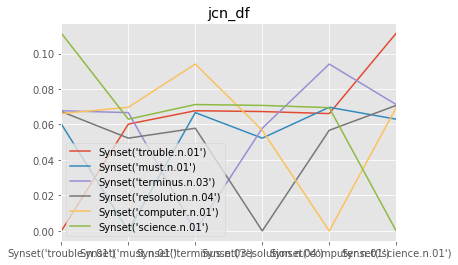

In [290]:
jcn_df.plot(title='jcn_df')


In [ ]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

jcn_df.plot.scatter(x='a', y='b');

In [ ]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

In [ ]:
jcn_df.plot.scatter(x='a', y='b', c='c', s=50);

In [ ]:
jcn_df.plot(style=['o','rx','kk'])